# WEBSCRAPING

In [ ]:
import requests
from bs4 import BeautifulSoup # Part of the bs4 library, used to parse and extract data from HTML pages
import urllib.request # Used to send requests to web pages and retrieve their HTML content
import re # The regular expressions (regex) library, used to find and replace patterns in text
import pandas as pd
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import sys

# Add your absolute path of your project folder to system path.
sys.path.append("/content/drive/My Drive/CS 561")

# See the full list of paths in sys.path
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython', '/content/drive/My Drive/CS 561']


In [ ]:
%cd "/content/drive/My Drive/CS 561"

/content/drive/My Drive/CS 561


#### Importing list Unscrapped links

In [ ]:
df1 = pd.read_csv('un-scrapped.csv')
df1.head()

,Unnamed: 0,Un-scrapped
0,0,https://www.yelp.com/biz/c-level-san-diego-6?s...
1,1,https://www.yelp.com/biz/c-level-san-diego-6?s...
2,2,https://www.yelp.com/biz/c-level-san-diego-6?s...
3,3,https://www.yelp.com/biz/c-level-san-diego-6?s...
4,4,https://www.yelp.com/biz/c-level-san-diego-6?s...


In [ ]:
df2 = pd.read_csv('un-scrapped2.csv')
df2.head()

,Unnamed: 0,Un-scrapped
0,0,https://www.yelp.com/biz/c-level-san-diego-6?s...
1,1,https://www.yelp.com/biz/c-level-san-diego-6?s...
2,2,https://www.yelp.com/biz/c-level-san-diego-6?s...
3,3,https://www.yelp.com/biz/c-level-san-diego-6?s...
4,4,https://www.yelp.com/biz/c-level-san-diego-6?s...


In [ ]:
df = pd.concat([df1,df2], ignore_index=True)
df.shape

(62, 2)

#### Website Scraped

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Referer': 'https://www.yelp.com'
}

In [ ]:
num_pages = df.shape[0]
num_pages

62

In [ ]:
url = df['Un-scrapped'].values.tolist()
url[0:10]

['https://www.yelp.com/biz/c-level-san-diego-6?start=230',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=290',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=320',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=330',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=430',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=620',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=640',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=670',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=700',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=1140']

#### Scraping reviews in pages

In [ ]:
def scrape_reviews (url):
  print(url)
  result = requests.get(url)
  soup = BeautifulSoup(result.text,'html.parser')
  ############# Getting comments ##############
  reviews = soup.find_all('p', class_=["comment__09f24__D0cxf y-css-1wfz87z","comment__09f24__D0cxf truncated__09f24__IiW9r y-css-1wfz87z"])
  rev = []
  if reviews:
    for review in reviews:
        rev.append(review.text)
  #print(rev)

  ########### Getting dates for respective review ##############
  date_ext = soup.find_all('div', class_='y-css-scqtta')
  #print(len(rating_div))

  date = []
  if date_ext:
    for dt in date_ext:
        date.append(dt.text)
  #print(len(date))

  ########### Getting star ratings for respective review ##############
  rating_div = soup.find_all('div', class_='y-css-dnttlc')
  #print(len(rating_div))

  rt = []
  if rating_div:
    for rte in rating_div:
        #rr = rte.find('div', {"aria-label": re.compile('star rating')})["aria-label"].split()[0]
        rt.append(rte.get('aria-label'))
  #print(len(rt))
  rt=rt[:len(rev)]

  df = pd.DataFrame({'Date': date,'Review': rev, 'Rating': rt})
  #print(df.head(10))
  return df

In [ ]:
cnt = 1
df = pd.DataFrame({'Date': [],'Review': [], 'Rating': []})
lst_url = []
rnd = 0
for link in url:
  print(f"Scraping page {cnt}")
  cnt += 1
  df_temp = scrape_reviews(link)
  if df_temp.shape[0] == 0 :
    print( "EMPTY")
    time.sleep(5)
    df_temp = scrape_reviews(link)
    print(df_temp.shape[0])
    if df_temp.shape[0] == 0 :
      lst_url.append(link)


  rnd = rnd + df_temp.shape[0]
  df = pd.concat([df, df_temp], ignore_index=True)

Scraping page 1
https://www.yelp.com/biz/c-level-san-diego-6?start=230
Scraping page 2
https://www.yelp.com/biz/c-level-san-diego-6?start=290
Scraping page 3
https://www.yelp.com/biz/c-level-san-diego-6?start=320
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=320
11
Scraping page 4
https://www.yelp.com/biz/c-level-san-diego-6?start=330
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=330
10
Scraping page 5
https://www.yelp.com/biz/c-level-san-diego-6?start=430
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=430
0
Scraping page 6
https://www.yelp.com/biz/c-level-san-diego-6?start=620
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=620
11
Scraping page 7
https://www.yelp.com/biz/c-level-san-diego-6?start=640
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=640
12
Scraping page 8
https://www.yelp.com/biz/c-level-san-diego-6?start=670
Scraping page 9
https://www.yelp.com/biz/c-level-san-diego-6?start=700
Scraping page 10
https://www.yelp.com/biz/

In [ ]:
df.shape

(613, 3)

In [ ]:
rnd

22

In [ ]:
lst_url

['https://www.yelp.com/biz/c-level-san-diego-6?start=430',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=1750',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=1930',
 'https://www.yelp.com/biz/c-level-san-diego-6?start=1980']

In [ ]:
lst_url2 = []
rnd = 0
for link in lst_url:
  #print(f"Scraping page {cnt}")
  #cnt += 1
  df_temp = scrape_reviews(link)
  if df_temp.shape[0] == 0 :
    print("EMPTY")
    time.sleep(10)
    df_temp = scrape_reviews(link)
    print(df_temp.shape[0])
    if df_temp.shape[0] == 0 :
      lst_url.append(link)


  rnd = rnd + df_temp.shape[0]
  df = pd.concat([df, df_temp], ignore_index=True)

https://www.yelp.com/biz/c-level-san-diego-6?start=1930
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=1930
0
https://www.yelp.com/biz/c-level-san-diego-6?start=1980
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=1980
0


In [ ]:
df.shape

(635, 3)

In [ ]:
df.tail(10)

,Date,Review,Rating
625,"Dec 14, 2019Previous review",12/13/19It was our first time and despite the ...,2 star rating
626,"Sep 20, 2015",One of my favorite places for lunch! I definit...,5 star rating
627,"Dec 13, 2021",Very good service by staff and food was great....,5 star rating
628,"Jan 20, 2022",The food was delicious and the waiter was the ...,5 star rating
629,"Mar 7, 2020",Second time I'm coming here and it always feel...,5 star rating
630,"Jul 2, 2021","The food was good, the drinks were excellent. ...",4 star rating
631,"Dec 29, 2022",Great scenery and great food. The staff were f...,5 star rating
632,"Aug 24, 2017",We took some friends here from Carlsbad while ...,3 star rating
633,"Aug 11, 2015",Easily one of my favorite (if not my favorite)...,5 star rating
634,"Sep 29, 2020",Came here for lunch on a Friday. The place is ...,3 star rating


In [ ]:
url = ["https://www.yelp.com/biz/c-level-san-diego-6?start=1930","https://www.yelp.com/biz/c-level-san-diego-6?start=1980"]

In [ ]:
cnt = 1
df = pd.DataFrame({'Date': [],'Review': [], 'Rating': []})
lst_url = []
rnd = 0
for link in url:
  print(f"Scraping page {cnt}")
  cnt += 1
  df_temp = scrape_reviews(link)
  if df_temp.shape[0] == 0 :
    print( "EMPTY")
    time.sleep(5)
    df_temp = scrape_reviews(link)
    print(df_temp.shape[0])
    if df_temp.shape[0] == 0 :
      lst_url.append(link)


  rnd = rnd + df_temp.shape[0]
  df = pd.concat([df, df_temp], ignore_index=True)

Scraping page 1
https://www.yelp.com/biz/c-level-san-diego-6?start=1930
Scraping page 2
https://www.yelp.com/biz/c-level-san-diego-6?start=1980
EMPTY
https://www.yelp.com/biz/c-level-san-diego-6?start=1980
11


In [ ]:
df.shape

(24, 3)

In [ ]:
import openpyxl

def replace_invalid_chars(text):
    """Replaces invalid characters for Excel with empty strings."""
    # Control characters (0x00-0x1F) except tab (0x09), newline (0x0A), and carriage return (0x0D)
    # Also replace the null character (0x00)
    invalid_chars = list(range(0, 32)) # Add null char to the list of invalid_chars
    invalid_chars.remove(9)  # Tab
    invalid_chars.remove(10)  # Newline
    invalid_chars.remove(13)  # Carriage return

    for char_code in invalid_chars:
        text = text.replace(chr(char_code), "")

    return text

# Apply the function to all string columns in the DataFrame
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(replace_invalid_chars)

# Now try exporting to Excel
df.to_excel('reviews5.xlsx', index=False, engine='openpyxl')

## Creating single file for all reviews

In [ ]:
df = pd.DataFrame({'Date': [],'Review': [], 'Rating': []})
for nm in range(1,6):
  df_read = pd.read_excel(f'reviews{nm}.xlsx')
  df = pd.concat([df, df_read], ignore_index=True)

df.shape

(4200, 3)

In [ ]:
df.tail()

,Date,Review,Rating
4195,"Sep 6, 2021",Loved everything about this place. Great views...,5 star rating
4196,"Jun 13, 2021",Did a girls trip to San Diego and looked up th...,5 star rating
4197,"Jul 20, 2021",Came for happy hour and it was great! The outd...,5 star rating
4198,"Dec 4, 2018","For starters, our hostess was great. Very frie...",2 star rating
4199,"Jun 11, 2022",My husband and I came here to have lunch at 11...,4 star rating


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4200 non-null   object
 1   Review  4200 non-null   object
 2   Rating  4200 non-null   object
dtypes: object(3)
memory usage: 98.6+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
Date,4200,2907,"Jun 26, 2023",7
Review,4200,4192,Excellent fish & chips! Nice light breading. G...,2
Rating,4200,5,5 star rating,2533


In [ ]:
df['Rating'].value_counts()

,count
Rating,
5 star rating,2533
4 star rating,1002
3 star rating,362
2 star rating,170
1 star rating,133


<Axes: xlabel='Rating'>

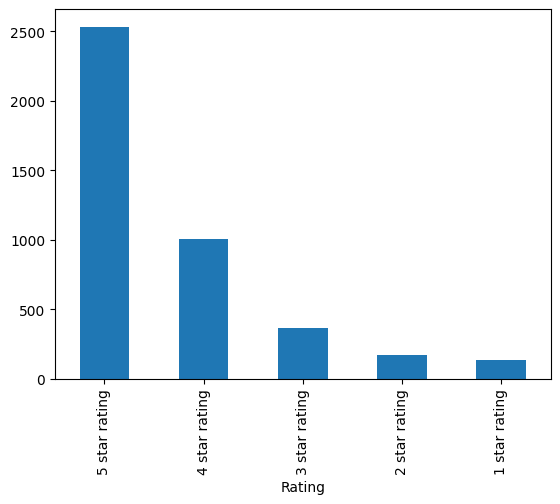

In [ ]:
df['Rating'].value_counts().plot(kind='bar')

In [ ]:
import numpy as np

In [ ]:
df['Labels'] = np.where(df['Rating'].isin(['3 star rating','2 star rating','1 star rating']), 'Poor Rating', df['Rating'])
df['Labels'].value_counts()

,count
Labels,
5 star rating,2533
4 star rating,1002
Poor Rating,665


In [ ]:
len(df['Date'].iloc[0])

11

In [ ]:
df['Date_E'] = df['Date'].str.replace('Updated review','')
df['Date_E'] = df['Date_E'].str.replace('Previous review','')
df['Year'] = df['Date_E'].str.slice(-4)
df['Date_E'] = pd.to_datetime(df['Date_E'], format='%b %d, %Y', errors='coerce')

df.head(20)

,Date,Review,Rating,Labels,Date_E,Year
0,"Nov 3, 2024",Good food and a great view . Extensive menu wi...,5 star rating,5 star rating,2024-11-03,2024
1,"Oct 25, 2024",Excellent service our server thoughtfully spli...,5 star rating,5 star rating,2024-10-25,2024
2,"Dec 6, 2024",If you're looking for a dining experience wher...,5 star rating,5 star rating,2024-12-06,2024
3,"Nov 26, 2024",We had a birthday celebration at the restauran...,4 star rating,4 star rating,2024-11-26,2024
4,"Nov 26, 2024",I recently dined at C Level Restaurant in San ...,5 star rating,5 star rating,2024-11-26,2024
5,"Nov 20, 2024",Happy hour with a beautiful view.came with cow...,4 star rating,4 star rating,2024-11-20,2024
6,"Dec 7, 2024",The location of this restaurant was immaculate...,5 star rating,5 star rating,2024-12-07,2024
7,"Nov 9, 2024","Had a reservation for a group of nine, and it ...",4 star rating,4 star rating,2024-11-09,2024
8,"Nov 14, 2024",Is there anything better than the San Diego wa...,5 star rating,5 star rating,2024-11-14,2024
9,"Nov 23, 2024",Friday date night we decided to go to C Level!...,5 star rating,5 star rating,2024-11-23,2024


In [ ]:
df.to_excel('reviews_final.xlsx', index=False, engine='openpyxl')

In [ ]:
df.drop(['Date','Rating','Date_E','Year'],axis=1,inplace=True)
df.to_excel('reviews_input.xlsx', index=False, engine='openpyxl')